In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from imblearn.metrics import geometric_mean_score
import tensorflow as tf
import matplotlib.pyplot as plt

In [3]:
# Load data
data = pd.read_excel('abc.xlsx')

# Preprocessing
le = LabelEncoder()
data['gender'] = le.fit_transform(data['gender'])  # Encode categorical variables
data['multi_screen'] = data['multi_screen'].map({'yes': 1, 'no': 0})
data['mail_subscribed'] = data['mail_subscribed'].map({'yes': 1, 'no': 0})

X = data.drop(columns=['churn', 'year', 'customer_id', 'phone_no'])
y = data['churn']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [5]:
# Function to build and train the model
def build_and_train(hidden_neurons, batch_size):
    model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(X_train.shape[1],)),
        tf.keras.layers.Dense(hidden_neurons, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    history = model.fit(
        X_train, y_train,
        validation_data=(X_test, y_test),
        epochs=50,
        batch_size=batch_size,
        verbose=0
    )
    return model

In [7]:

# Function to evaluate the model
def evaluate_model(model, X_test, y_test):
    y_pred = (model.predict(X_test) > 0.5).astype(int)
    
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    gmean = geometric_mean_score(y_test, y_pred)

    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not Churn", "Churn"])
    disp.plot(cmap=plt.cm.Blues)
    plt.title("Confusion Matrix")
    plt.show()

    return acc, f1, gmean

In [9]:
# Hyperparameter combinations
hidden_neurons_list = [16, 32]
batch_sizes = [16, 32, 64]
#since the dataset only contains 2000 datapoints; a smaller no. of hidden neurons and batch_sizes were adopted for running the model

Training with 16 neurons and batch size 16...
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 802us/step


/opt/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


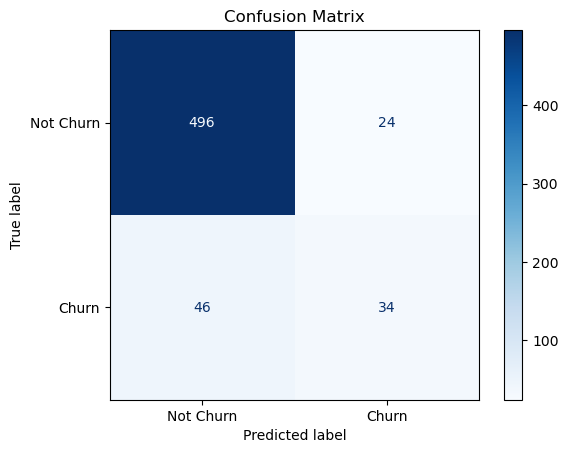

Training with 16 neurons and batch size 32...
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 790us/step


/opt/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


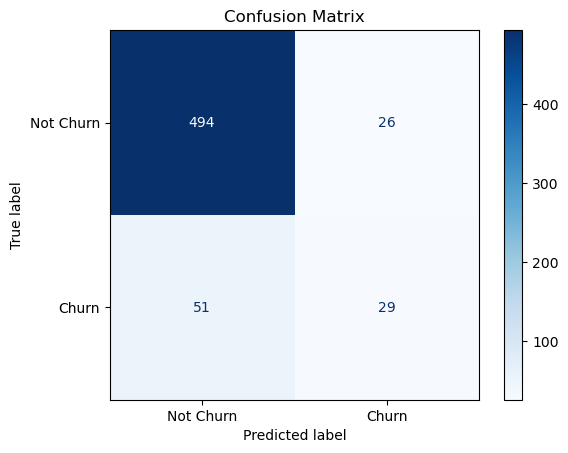

Training with 16 neurons and batch size 64...
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 804us/step


/opt/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


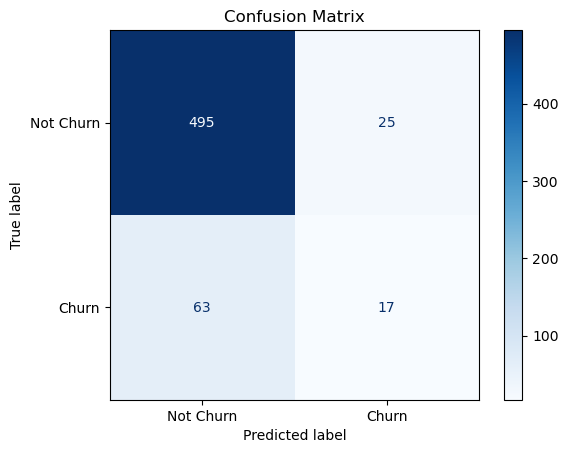

Training with 32 neurons and batch size 16...
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 797us/step


/opt/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


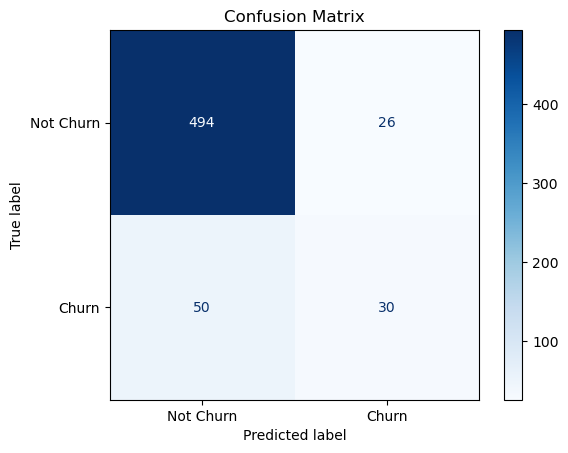

Training with 32 neurons and batch size 32...
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 806us/step


/opt/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


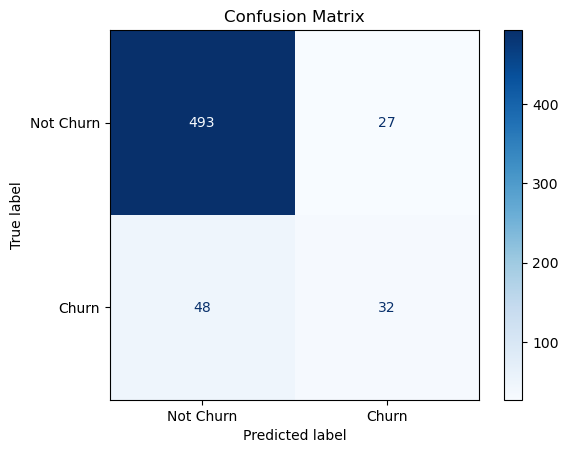

Training with 32 neurons and batch size 64...
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 794us/step


/opt/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


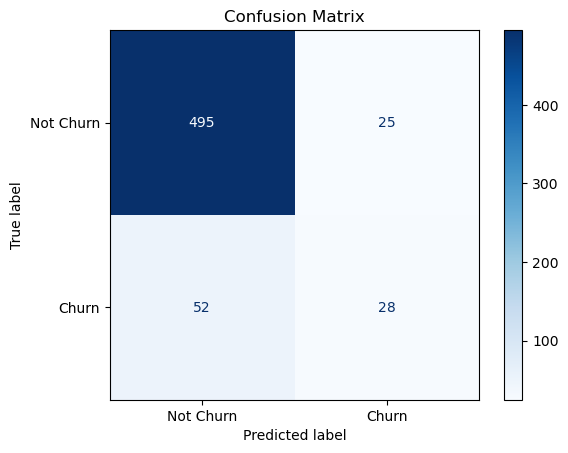

In [13]:
# Train and evaluate for each combination
results = []
for hidden_neurons in hidden_neurons_list:
    for batch_size in batch_sizes:
        print(f"Training with {hidden_neurons} neurons and batch size {batch_size}...")
        model = build_and_train(hidden_neurons, batch_size)
        acc, f1, gmean = evaluate_model(model, X_test, y_test)
        results.append({
            'hidden_neurons': hidden_neurons,
            'batch_size': batch_size,
            'accuracy': acc,
            'f1_score': f1,
            'geometric_mean': gmean
        })

In [15]:
# Display results
results_df = pd.DataFrame(results)
print(results_df)

   hidden_neurons  batch_size  accuracy  f1_score  geometric_mean
0              16          16  0.883333  0.492754        0.636698
1              16          32  0.871667  0.429630        0.586835
2              16          64  0.853333  0.278689        0.449760
3              32          16  0.873333  0.441176        0.596867
4              32          32  0.875000  0.460432        0.615817
5              32          64  0.871667  0.421053        0.577211


In [29]:
# Function to evaluate the model and return confusion matrix values
def evaluate_model(model, X_test, y_test):
    y_pred = (model.predict(X_test) > 0.5).astype(int)
    
    # Calculate accuracy, F1 score, and geometric mean score
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    gmean = geometric_mean_score(y_test, y_pred)

    # Calculate confusion matrix values
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm.ravel()  # Extract the TP, FP, FN, TN values


    return acc, f1, gmean, tn, fp, fn, tp

# Hyperparameter combinations
hidden_neurons_list = [16, 32]
batch_sizes = [16, 32, 64]

# Train and evaluate for each combination
results = []
for hidden_neurons in hidden_neurons_list:
    for batch_size in batch_sizes:
        print(f"Training with {hidden_neurons} neurons and batch size {batch_size}...")
        model = build_and_train(hidden_neurons, batch_size)
        acc, f1, gmean, tn, fp, fn, tp = evaluate_model(model, X_test, y_test)
        results.append({
            'hidden_neurons': hidden_neurons,
            'batch_size': batch_size,
            'accuracy': acc,
            'f1_score': f1,
            'geometric_mean': gmean,
            'TP': tp,
            'FP': fp,
            'FN': fn,
            'TN': tn
        })

# Display results in tabular format
results_df = pd.DataFrame(results)
print(results_df)

Training with 16 neurons and batch size 16...
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 795us/step
Training with 16 neurons and batch size 32...


/opt/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 801us/step
Training with 16 neurons and batch size 64...


/opt/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 798us/step
Training with 32 neurons and batch size 16...


/opt/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 813us/step
Training with 32 neurons and batch size 32...


/opt/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 805us/step
Training with 32 neurons and batch size 64...


/opt/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 795us/step
   hidden_neurons  batch_size  accuracy  f1_score  geometric_mean  TP  FP  FN  \
0              16          16  0.888333  0.510949        0.647295  35  22  45   
1              16          32  0.868333  0.414815        0.576044  28  27  52   
2              16          64  0.863333  0.359375        0.523142  23  25  57   
3              32          16  0.880000  0.492958        0.644037  35  27  45   
4              32          32  0.881667  0.496454        0.644690  35  26  45   
5              32          64  0.875000  0.436090        0.588021  29  24  51   

    TN  
0  498  
1  493  
2  495  
3  493  
4  494  
5  496  


/opt/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
